In [1]:
import numpy as np
import shutil
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
analyses = ["2.00", "2.22", "2.44", "2.67", "2.89", "3.11", "3.33"]

In [3]:
info_files = []

for analysis in analyses:
    with open('./results/old parameters/' + analysis + '/info.pkl', 'rb') as info_file:
        info_files.append(pickle.load(info_file))

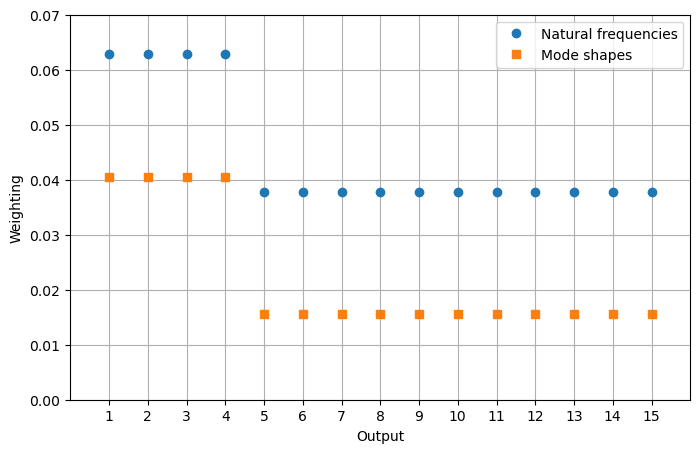

In [4]:
outputs = int(len(info_files[-1]['W']) / 2)
x_list = np.arange(1, outputs+1)

weighting = np.diag(np.around(info_files[-1]['W'], 5))

plt.figure(figsize=(8, 5))
plt.plot(x_list, weighting[:outputs], 'o', label="Natural frequencies")
plt.plot(x_list, weighting[outputs:], 's', label="Mode shapes")
plt.legend()
plt.xticks(x_list)
plt.xlabel("Output")
plt.ylabel("Weighting")
plt.ylim(0,0.07)
plt.xlim(0, 16)
plt.grid()
# plt.savefig("weighting.svg")
plt.show()

In [5]:
J_index = []

for i, analysis in enumerate(analyses):
    J_index.append(np.argmin(info_files[i]['J_star_list']))

J_index

[18, 15, 15, 14, 15, 14, 14]

In [6]:
for analysis, iteration in enumerate(J_index):

    MAC_initial = info_files[analysis]['MAC_initial']
    MAC_updated = info_files[analysis]['MAC_updated']['MAC_updated' + str(iteration)]

    MMI_initial = info_files[analysis]['MMI_initial']
    MMI_updated = info_files[analysis]['MMI_updated']['MMI_updated' + str(iteration)]

    ind_list_initial = []
    ind_list_updated = []
    naming_rows_initial = []
    naming_rows_updated = []

    for i in range(len(MAC_initial[1])):
        ind = np.argsort(MMI_initial[:,i])[::-1]
        ind_list_initial.append(ind[0])
        naming_rows_initial.append(ind[0] + 1)

    MAC_initial_sorted = MAC_initial[ind_list_initial,:]
    MAC_initial_sorted_diag = np.diag(MAC_initial_sorted)

    for i in range(len(MAC_updated[1])):
        ind = np.argsort(MMI_updated[:,i])[::-1]
        ind_list_updated.append(ind[0])
        naming_rows_updated.append(ind[0] + 1)

    MAC_updated_sorted = MAC_updated[ind_list_updated,:]
    MAC_updated_sorted_diag = np.diag(MAC_updated_sorted)

    MAC_change = MAC_updated_sorted_diag - MAC_initial_sorted_diag

    ind_list_initial = []
    ind_list_updated = []
    naming_rows_initial = []
    naming_rows_updated = []

    for i in range(len(MMI_initial[1])):
        ind = np.argsort(MMI_initial[:,i])[::-1]
        ind_list_initial.append(ind[0])
        naming_rows_initial.append(ind[0] + 1)

    MMI_initial_sorted = MMI_initial[ind_list_initial,:]
    MMI_initial_sorted_diag = np.diag(MMI_initial_sorted)

    for i in range(len(MMI_updated[1])):
        ind = np.argsort(MMI_updated[:,i])[::-1]
        ind_list_updated.append(ind[0])
        naming_rows_updated.append(ind[0] + 1)

    MMI_updated_sorted = MMI_updated[ind_list_updated,:]
    MMI_updated_sorted_diag = np.diag(MMI_updated_sorted)

    MMI_change = MMI_updated_sorted_diag - MMI_initial_sorted_diag

    measured_fn = info_files[analysis]['lamda_m'][0:len(MAC_change)]
    mode_array = np.array([int(i+1) for i in range(0, len(measured_fn))])

    initial_fn = info_files[analysis]['lamda'][0, 0:len(MAC_change)]
    initial_error = np.abs(measured_fn - initial_fn) / measured_fn * 100

    updated_fn = info_files[analysis]['lamda'][int(iteration), 0:len(MAC_change)]
    updated_error = np.abs(measured_fn - updated_fn) / measured_fn * 100


    column_names = ["Mode", "Measured f_n", "Initial f_n", "Error [%]", "Updated f_n", "Error [%]", 
                    "Initial MAC", "Updated MAC", "Change", "Initial MMI", "Updated MMI", "Change"]

    columns = np.array([mode_array, np.round(measured_fn, 4), np.round(initial_fn, 4), np.round(initial_error, 2),
                        np.round(updated_fn, 4), np.round(updated_error, 2), np.round(MAC_initial_sorted_diag, 4), 
                        np.round(MAC_updated_sorted_diag, 4), np.round(MAC_change, 4),
                        np.round(MMI_initial_sorted_diag, 4), np.round(MMI_updated_sorted_diag, 4), np.round(MMI_change, 4)])

    mac_table = pd.DataFrame(columns.T, columns=column_names)
    mac_table[["Mode"]] = mac_table[["Mode"]].astype(int)

    j_star_0 = info_files[analysis]['J_star_list'][0]
    j_star = info_files[analysis]['J_star_list'][iteration]
    j_star_change = (j_star - j_star_0) / np.abs(j_star_0) * 100


    print(f"Analysis: {analyses[analysis]} after iteration {iteration}")
    display(mac_table)
    print(f"Sum of MAC change = {round(np.sum(MAC_change), 3)}")
    print(f"Sum of MMI change = {round(np.sum(MMI_change), 3)}")
    print(f"Mean updated frequency error = {round(np.mean(updated_error), 2)} %")
    print(f"Change in objective function = {round(j_star_change, 2)} %")
    print("\n")

Analysis: 2.00 after iteration 18


,Mode,Measured f_n,Initial f_n,Error [%],Updated f_n,Error [%],Initial MAC,Updated MAC,Change,Initial MMI,Updated MMI,Change
0,1,0.2999,0.2853,4.87,0.2812,6.22,0.8987,0.8989,0.0002,0.4250,0.4184,-0.0066
1,2,0.3839,0.3965,3.27,0.3701,3.61,0.9659,0.9697,0.0038,0.4666,0.4668,0.0002
2,3,0.6197,0.7004,13.03,0.6401,3.30,0.9278,0.9241,-0.0038,0.3988,0.4455,0.0468
3,4,0.8202,0.9371,14.25,0.8498,3.60,0.7741,0.8533,0.0792,0.3158,0.4086,0.0928
4,5,1.0875,1.3722,26.18,1.0660,1.98,0.7427,0.6538,-0.0889,0.2405,0.3170,0.0765
5,6,1.2205,1.2991,6.44,1.0957,10.22,0.6751,0.6895,0.0143,0.3053,0.2936,-0.0117
6,7,1.3607,1.6837,23.74,1.4661,7.74,0.8858,0.7816,-0.1042,0.3242,0.3521,0.0279
7,8,1.6172,1.8918,16.98,1.6843,4.15,0.7641,0.8542,0.0901,0.2972,0.4063,0.1092
8,9,2.1106,2.2030,4.38,2.0110,4.72,0.4846,0.6147,0.1301,0.2204,0.2837,0.0633
9,10,1.0000,0.8987,10.13,0.8989,10.11,0.6147,0.6587,0.0440,0.2760,0.2713,-0.0047


Sum of MAC change = -0.328
Sum of MMI change = 0.38
Mean updated frequency error = 9.77 %
Change in objective function = -42.97 %


Analysis: 2.22 after iteration 15


,Mode,Measured f_n,Initial f_n,Error [%],Updated f_n,Error [%],Initial MAC,Updated MAC,Change,Initial MMI,Updated MMI,Change
0,1,0.2999,0.2853,4.87,0.2640,11.96,0.8987,0.9007,0.0020,0.4250,0.3905,-0.0345
1,2,0.3839,0.3965,3.27,0.3577,6.82,0.9659,0.9694,0.0036,0.4666,0.4506,-0.0159
2,3,0.6197,0.7004,13.03,0.6273,1.23,0.9278,0.9371,0.0093,0.3988,0.4624,0.0637
3,4,0.8202,0.9371,14.25,0.8431,2.79,0.7741,0.8656,0.0915,0.3158,0.4189,0.1030
4,5,1.0875,1.3722,26.18,1.0661,1.98,0.7427,0.6488,-0.0939,0.2405,0.3145,0.0740
5,6,1.2205,1.2991,6.44,1.1340,7.09,0.6751,0.6896,0.0144,0.3053,0.3093,0.0040
6,7,1.3607,1.6837,23.74,1.4723,8.20,0.8858,0.8390,-0.0469,0.3242,0.3785,0.0543
7,8,1.6172,1.8918,16.98,1.7258,6.71,0.7641,0.8590,0.0950,0.2972,0.3960,0.0988
8,9,2.1106,2.2030,4.38,2.0756,1.66,0.4846,0.5499,0.0654,0.2204,0.2667,0.0463
9,10,2.4478,2.6015,6.28,2.2403,8.48,0.6147,0.6646,0.0498,0.2760,0.2899,0.0139


Sum of MAC change = -0.017
Sum of MMI change = 0.471
Mean updated frequency error = 8.32 %
Change in objective function = -34.66 %


Analysis: 2.44 after iteration 15


,Mode,Measured f_n,Initial f_n,Error [%],Updated f_n,Error [%],Initial MAC,Updated MAC,Change,Initial MMI,Updated MMI,Change
0,1,0.2999,0.2853,4.87,0.2697,10.07,0.8987,0.8957,-0.0030,0.4250,0.3975,-0.0275
1,2,0.3839,0.3965,3.27,0.3561,7.25,0.9659,0.9647,-0.0012,0.4666,0.4461,-0.0205
2,3,0.6197,0.7004,13.03,0.6368,2.75,0.9278,0.9334,0.0055,0.3988,0.4529,0.0542
3,4,0.8202,0.9371,14.25,0.8719,6.30,0.7741,0.8248,0.0507,0.3158,0.3809,0.0651
4,5,1.0875,1.3722,26.18,1.2820,17.88,0.7427,0.7536,0.0109,0.2405,0.2874,0.0469
5,6,1.2205,1.2991,6.44,1.2314,0.89,0.6751,0.6764,0.0012,0.3053,0.3337,0.0284
6,7,1.3607,1.6837,23.74,1.5688,15.30,0.8858,0.8485,-0.0373,0.3242,0.3478,0.0236
7,8,1.6172,1.8918,16.98,1.8567,14.81,0.7641,0.8859,0.1218,0.2972,0.3689,0.0717
8,9,2.1106,2.2030,4.38,2.0952,0.73,0.4846,0.5520,0.0674,0.2204,0.2723,0.0520
9,10,2.4478,2.6015,6.28,2.4602,0.51,0.6147,0.6551,0.0403,0.2760,0.3250,0.0490


Sum of MAC change = 0.285
Sum of MMI change = 0.437
Mean updated frequency error = 7.97 %
Change in objective function = -28.28 %


Analysis: 2.67 after iteration 14


,Mode,Measured f_n,Initial f_n,Error [%],Updated f_n,Error [%],Initial MAC,Updated MAC,Change,Initial MMI,Updated MMI,Change
0,1,0.2999,0.2853,4.87,0.2736,8.75,0.8987,0.9003,0.0016,0.4250,0.4064,-0.0186
1,2,0.3839,0.3965,3.27,0.3725,2.99,0.9659,0.9690,0.0032,0.4666,0.4696,0.0030
2,3,0.6197,0.7004,13.03,0.6527,5.32,0.9278,0.9358,0.0079,0.3988,0.4413,0.0425
3,4,0.8202,0.9371,14.25,0.8740,6.56,0.7741,0.8528,0.0787,0.3158,0.3936,0.0778
4,5,1.0875,1.3722,26.18,1.0765,1.01,0.7427,0.5412,-0.2016,0.2405,0.2655,0.0250
5,6,1.2205,1.2991,6.44,1.1708,4.07,0.6751,0.6927,0.0176,0.3053,0.3260,0.0207
6,7,1.3607,1.6837,23.74,1.5310,12.51,0.8858,0.8561,-0.0297,0.3242,0.3655,0.0413
7,8,1.6172,1.8918,16.98,1.7676,9.30,0.7641,0.8726,0.1085,0.2972,0.3898,0.0927
8,9,2.1106,2.2030,4.38,2.1294,0.89,0.4846,0.5740,0.0894,0.2204,0.2826,0.0622
9,10,2.4478,2.6015,6.28,2.3210,5.18,0.6147,0.6686,0.0538,0.2760,0.3084,0.0324


Sum of MAC change = -0.02
Sum of MMI change = 0.438
Mean updated frequency error = 6.22 %
Change in objective function = -20.35 %


Analysis: 2.89 after iteration 15


,Mode,Measured f_n,Initial f_n,Error [%],Updated f_n,Error [%],Initial MAC,Updated MAC,Change,Initial MMI,Updated MMI,Change
0,1,0.2999,0.2853,4.87,0.2735,8.78,0.8987,0.9003,0.0016,0.4250,0.4062,-0.0187
1,2,0.3839,0.3965,3.27,0.3725,2.98,0.9659,0.9690,0.0032,0.4666,0.4696,0.0031
2,3,0.6197,0.7004,13.03,0.6524,5.28,0.9278,0.9356,0.0078,0.3988,0.4414,0.0426
3,4,0.8202,0.9371,14.25,0.8734,6.48,0.7741,0.8533,0.0792,0.3158,0.3942,0.0784
4,5,1.0875,1.3722,26.18,1.0758,1.08,0.7427,0.5430,-0.1997,0.2405,0.2661,0.0256
5,6,1.2205,1.2991,6.44,1.1690,4.22,0.6751,0.6930,0.0179,0.3053,0.3254,0.0201
6,7,1.3607,1.6837,23.74,1.5294,12.40,0.8858,0.8548,-0.0310,0.3242,0.3654,0.0412
7,8,1.6172,1.8918,16.98,1.7659,9.20,0.7641,0.8725,0.1084,0.2972,0.3902,0.0931
8,9,2.1106,2.2030,4.38,2.1265,0.75,0.4846,0.5760,0.0915,0.2204,0.2843,0.0639
9,10,2.4478,2.6015,6.28,2.3171,5.34,0.6147,0.6687,0.0540,0.2760,0.3076,0.0317


Sum of MAC change = -0.028
Sum of MMI change = 0.435
Mean updated frequency error = 6.58 %
Change in objective function = -23.89 %


Analysis: 3.11 after iteration 14


,Mode,Measured f_n,Initial f_n,Error [%],Updated f_n,Error [%],Initial MAC,Updated MAC,Change,Initial MMI,Updated MMI,Change
0,1,0.2999,0.2853,4.87,0.2743,8.52,0.8987,0.9003,0.0016,0.4250,0.4075,-0.0175
1,2,0.3839,0.3965,3.27,0.3736,2.70,0.9659,0.9690,0.0032,0.4666,0.4710,0.0045
2,3,0.6197,0.7004,13.03,0.6544,5.60,0.9278,0.9354,0.0076,0.3988,0.4397,0.0410
3,4,0.8202,0.9371,14.25,0.8757,6.76,0.7741,0.8521,0.0780,0.3158,0.3922,0.0764
4,5,1.0875,1.3722,26.18,1.0777,0.91,0.7427,0.5402,-0.2026,0.2405,0.2656,0.0251
5,6,1.2205,1.2991,6.44,1.1719,3.98,0.6751,0.6932,0.0181,0.3053,0.3267,0.0214
6,7,1.3607,1.6837,23.74,1.5337,12.71,0.8858,0.8560,-0.0298,0.3242,0.3644,0.0402
7,8,1.6172,1.8918,16.98,1.7682,9.34,0.7641,0.8712,0.1071,0.2972,0.3889,0.0918
8,9,2.1106,2.2030,4.38,2.1302,0.93,0.4846,0.5764,0.0918,0.2204,0.2835,0.0631
9,10,2.4478,2.6015,6.28,2.3235,5.08,0.6147,0.6690,0.0543,0.2760,0.3091,0.0331


Sum of MAC change = -0.016
Sum of MMI change = 0.441
Mean updated frequency error = 7.01 %
Change in objective function = -19.62 %


Analysis: 3.33 after iteration 14


,Mode,Measured f_n,Initial f_n,Error [%],Updated f_n,Error [%],Initial MAC,Updated MAC,Change,Initial MMI,Updated MMI,Change
0,1,0.2999,0.2853,4.87,0.2762,7.91,0.8987,0.8993,0.0006,0.4250,0.4101,-0.0149
1,2,0.3839,0.3965,3.27,0.3741,2.55,0.9659,0.9685,0.0026,0.4666,0.4715,0.0049
2,3,0.6197,0.7004,13.03,0.6583,6.24,0.9278,0.9365,0.0086,0.3988,0.4370,0.0383
3,4,0.8202,0.9371,14.25,0.8843,7.81,0.7741,0.8444,0.0703,0.3158,0.3832,0.0674
4,5,1.0875,1.3722,26.18,1.0881,0.05,0.7427,0.5132,-0.2295,0.2405,0.2564,0.0159
5,6,1.2205,1.2991,6.44,1.1982,1.83,0.6751,0.6893,0.0142,0.3053,0.3355,0.0302
6,7,1.3607,1.6837,23.74,1.5576,14.47,0.8858,0.8673,-0.0185,0.3242,0.3613,0.0371
7,8,1.6172,1.8918,16.98,1.7960,11.06,0.7641,0.8742,0.1102,0.2972,0.3818,0.0847
8,9,2.1106,2.2030,4.38,2.0202,4.29,0.4846,0.5598,0.0752,0.2204,0.2585,0.0381
9,10,2.4478,2.6015,6.28,2.3815,2.71,0.6147,0.6665,0.0518,0.2760,0.3197,0.0437


Sum of MAC change = 0.07
Sum of MMI change = 0.457
Mean updated frequency error = 7.85 %
Change in objective function = -22.03 %




In [7]:
for analysis, iteration in enumerate(J_index):
    parameter = [r'$E_{s,b}$', r'$\rho_s$', r'$E_{c,t}$', r'$E_{s,c}$', r'$k_y$', r'$k_z$', 
                r'$k_{\phi_x}$', r'$k_{\phi_y}$', r'$k_{\phi_z}$']

    parameter_ref_value = info_files[analysis]["theta"][0]
    parameter_upd_value = info_files[analysis]["theta"][int(iteration)]
    parameter_change = (parameter_upd_value - parameter_ref_value) / parameter_ref_value * 100

    parameter_ref_value_scientific = ["{:.3e}".format(i) for i in parameter_ref_value]
    parameter_upd_value_scientific = ["{:.3e}".format(i) for i in parameter_upd_value]

    parameter_column = ["Parameter", "Referance value", "Updated value", "Change [%]"]
    parameter_columns = np.array([parameter, parameter_ref_value_scientific, parameter_upd_value_scientific, np.around(parameter_change, 2)])

    pd.reset_option('display.float_format')
    parameter_table = pd.DataFrame(parameter_columns.T, columns=parameter_column)
    # print(pd.DataFrame.to_latex(parameter_table))

    print(f"Analysis: {analyses[analysis]}")
    display(parameter_table)

Analysis: 2.00


,Parameter,Referance value,Updated value,Change [%]
0,"$E_{s,b}$",2.100e+11,1.078e+11,-48.68
1,$\rho_s$,7.850e+03,8.987e+03,14.48
2,"$E_{c,t}$",2.700e+10,4.500e+10,66.67
3,"$E_{s,c}$",2.500e+03,2.557e+03,2.29
4,$k_y$,1.000e+10,2.074e+10,107.36
5,$k_z$,1.000e+10,3.078e+09,-69.22
6,$k_{\phi_x}$,1.000e+12,2.293e+12,129.32
7,$k_{\phi_y}$,1.000e+12,3.064e+11,-69.36
8,$k_{\phi_z}$,1.000e+12,2.488e+12,148.83


Analysis: 2.22


,Parameter,Referance value,Updated value,Change [%]
0,"$E_{s,b}$",2.100e+11,1.500e+11,-28.57
1,$\rho_s$,7.850e+03,1.000e+04,27.39
2,"$E_{c,t}$",2.700e+10,3.500e+10,29.63
3,"$E_{s,c}$",2.500e+03,2.876e+03,15.03
4,$k_y$,1.000e+10,2.488e+10,148.83
5,$k_z$,1.000e+10,3.518e+08,-96.48
6,$k_{\phi_x}$,1.000e+12,4.953e+12,395.34
7,$k_{\phi_y}$,1.000e+12,5.278e+10,-94.72
8,$k_{\phi_z}$,1.000e+12,2.986e+12,198.6


Analysis: 2.44


,Parameter,Referance value,Updated value,Change [%]
0,"$E_{s,b}$",2.100e+11,2.420e+11,15.25
1,$\rho_s$,7.850e+03,1.000e+04,27.39
2,"$E_{c,t}$",2.700e+10,3.500e+10,29.63
3,"$E_{s,c}$",2.500e+03,3.303e+03,32.14
4,$k_y$,1.000e+10,2.074e+10,107.36
5,$k_z$,1.000e+10,4.008e+09,-59.92
6,$k_{\phi_x}$,1.000e+12,3.518e+10,-96.48
7,$k_{\phi_y}$,1.000e+12,3.518e+10,-96.48
8,$k_{\phi_z}$,1.000e+12,2.488e+12,148.83


Analysis: 2.67


,Parameter,Referance value,Updated value,Change [%]
0,"$E_{s,b}$",2.100e+11,1.511e+11,-28.04
1,$\rho_s$,7.850e+03,1.000e+04,27.39
2,"$E_{c,t}$",2.700e+10,3.500e+10,29.63
3,"$E_{s,c}$",2.500e+03,2.537e+03,1.49
4,$k_y$,1.000e+10,2.488e+10,148.83
5,$k_z$,1.000e+10,7.514e+09,-24.86
6,$k_{\phi_x}$,1.000e+12,3.977e+12,297.72
7,$k_{\phi_y}$,1.000e+12,1.484e+11,-85.16
8,$k_{\phi_z}$,1.000e+12,2.488e+12,148.83


Analysis: 2.89


,Parameter,Referance value,Updated value,Change [%]
0,"$E_{s,b}$",2.100e+11,1.500e+11,-28.57
1,$\rho_s$,7.850e+03,1.000e+04,27.39
2,"$E_{c,t}$",2.700e+10,3.500e+10,29.63
3,"$E_{s,c}$",2.500e+03,2.533e+03,1.33
4,$k_y$,1.000e+10,3.583e+10,258.32
5,$k_z$,1.000e+10,4.008e+09,-59.92
6,$k_{\phi_x}$,1.000e+12,3.440e+12,243.99
7,$k_{\phi_y}$,1.000e+12,2.672e+11,-73.28
8,$k_{\phi_z}$,1.000e+12,3.583e+12,258.32


Analysis: 3.11


,Parameter,Referance value,Updated value,Change [%]
0,"$E_{s,b}$",2.100e+11,1.500e+11,-28.57
1,$\rho_s$,7.850e+03,1.000e+04,27.39
2,"$E_{c,t}$",2.700e+10,3.500e+10,29.63
3,"$E_{s,c}$",2.500e+03,2.506e+03,0.25
4,$k_y$,1.000e+10,2.986e+10,198.6
5,$k_z$,1.000e+10,3.340e+09,-66.6
6,$k_{\phi_x}$,1.000e+12,4.128e+12,312.78
7,$k_{\phi_y}$,1.000e+12,1.484e+11,-85.16
8,$k_{\phi_z}$,1.000e+12,2.986e+12,198.6


Analysis: 3.33


,Parameter,Referance value,Updated value,Change [%]
0,"$E_{s,b}$",2.100e+11,1.665e+11,-20.71
1,$\rho_s$,7.850e+03,1.000e+04,27.39
2,"$E_{c,t}$",2.700e+10,3.500e+10,29.63
3,"$E_{s,c}$",2.500e+03,2.556e+03,2.26
4,$k_y$,1.000e+10,2.488e+10,148.83
5,$k_z$,1.000e+10,3.340e+09,-66.6
6,$k_{\phi_x}$,1.000e+12,3.963e+12,296.27
7,$k_{\phi_y}$,1.000e+12,4.398e+10,-95.6
8,$k_{\phi_z}$,1.000e+12,2.986e+12,198.6
